In [1]:
import matplotlib.pyplot as plt

import numpy as np
import math

import cv2 as cv2

import os
import os.path

import glob

import time

plt.rcParams.update({'font.size': 12})

In [2]:
filenames = glob.glob('./*.tif')

print(filenames)

['./H72M-6.tif', './H82T-6.tif', './H75T-1.tif', './H75T-2.tif', './H82T-7.tif', './H75T-5.tif', './H82T-8.tif', './H72M-3.tif', './H81T-1.tif', './H80M-3.tif', './H81T-3.tif', './H70T-7.tif', './H82T-4.tif', './H68T-1.tif', './H81M-2.tif', './H71M-3.tif', './H70T-5.tif', './H82M-3.tif', './H70T-6.tif', './H82M-5.tif', './H82M-1.tif', './H82T-11.tif', './H81M-4.tif', './H72M-5.tif', './H80M-2.tif', './H72M-1.tif', './H82T-5.tif', './H75M-4.tif', './H68T-4.tif', './H70M-1.tif', './H82M-4.tif', './H70T-1.tif', './H70M-5.tif', './H68M-7.tif', './H71M-5.tif', './H70T-8.tif', './H74M-3.tif', './H68T-2.tif', './H80M-1.tif', './H81M-1.tif', './H75M-3.tif', './H75T-3.tif', './H72M-2.tif', './H70M-3.tif', './H71M-4.tif', './H80M-5.tif', './H71M-2.tif', './H74M-1.tif', './H80T-5.tif', './H68M-3.tif', './H81T-2.tif', './H80M-4.tif', './H72M-7.tif', './H68M-1.tif', './H68M-4.tif', './H81M-3.tif', './H82M-2.tif', './H68T-6.tif', './H80T-2.tif', './H74M-2.tif', './H72M-4.tif', './H75T-4.tif', './H70

In [3]:
len(filenames)

86

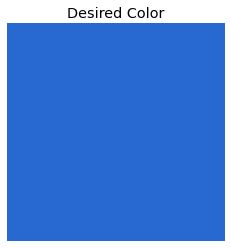

In [4]:
color_to_be_segmented = [39, 105, 209]

color_to_be_segmented = np.asarray(color_to_be_segmented)

plt.imshow(np.atleast_3d(color_to_be_segmented).reshape(1, 1, 3))
plt.title('Desired Color')
plt.axis('off')

print()

In [5]:
def distance(a, b):

    return math.hypot(*(v2 - v1 for v1, v2 in zip(a, b)))

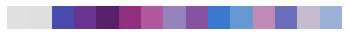

Finished processing file: H68M-1, with time 74 seconds, with palette (see above).



In [ ]:
print()

for filename in sorted(filenames):
    
    ########################################################
    
    os.system('rm -rf ' + filename[:-4][2:])
    
    os.mkdir(filename[:-4])
    
    ########################################################
    
    start = time.time()

    ########################################################

    image = cv2.imread(filename, cv2.IMREAD_COLOR)
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    h, w, c = image.shape

    # reshape to 1D array

    image_2d = image.reshape(h * w, c).astype(np.float32)

    ##############
    
    # set number of colors

    numcolors = 15

    numiters = 30

    epsilon = 1

    attempts = 30
    
    ##############
    
#     numcolors = 12

#     numiters = 5

#     epsilon = 1

#     attempts = 5

    ##############

    # do kmeans processing

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 
                numiters, epsilon)

    ret, labels, centers = cv2.kmeans(image_2d, numcolors, 
                                      None, criteria, attempts, 
                                      cv2.KMEANS_RANDOM_CENTERS)

    ########################################################

    # reconstitute 2D image of results

    centers = np.uint8(centers)

    newimage = centers[labels.flatten()]

    newimage = newimage.reshape(image.shape)

    ########################################################
    
    palette = np.array(centers)[np.newaxis, :, :]

    plt.figure(figsize = (10, 4))

    plt.imshow(palette)

    plt.axis('off')

    file_string = filename[:-4] + '/Palette.tif'
    
    plt.savefig(file_string)
        
    plt.close()
    
    ########################################################

    closest = sorted(centers, key = lambda x: distance(color_to_be_segmented, x))

    closest_color = closest[0]
    
    layer = newimage.copy()

    mask = cv2.inRange(layer, closest_color, closest_color)

    layer[mask == 0] = [255, 255, 255]

    cv2.imwrite(os.path.join(filename[:-4], 'Closest_Segmented_Image.tif'), layer)
    
    ########################################################

    k = 0

    for center in centers:

        layer = newimage.copy()

        mask = cv2.inRange(layer, center, center)

        layer[mask == 0] = [255, 255, 255]

        cv2.imwrite(os.path.join(filename[:-4], 'Layer_' + str(k) + '.tif'), layer)
        
        k = k + 1

    ########################################################
    
    os.system('cp ' + filename[2:] + ' ' + filename[:-4] +'/')
    
    ########################################################
    
    del ret, labels, centers, layer, mask, newimage

    ########################################################
    
    end = time.time()
    
    ########################################################
    
    plt.imshow(palette)

    plt.axis('off')
    
    plt.show()
    
    print('Finished processing file: ' + filename[:-4][2:] + 
          ', with time ' + str(np.int32(end - start)) + ' seconds, with palette (see above).')
    
    print()
    
    ########################################################
        
print()